# 降水插值

In [ ]:

import conda

conda_file_dir = conda.__file__

conda_dir = conda_file_dir.split('lib')[0]

proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')

os.environ["PROJ_LIB"] = proj_lib

(200, 2) (200,) (50, 50)
[0.64688556 0.9780188  0.67821817 0.17176069 0.57140376 0.56784083
 0.14271054 0.16842596 0.01334844 0.59225766 0.98385996 0.72849695
 0.24283306 0.68354332 0.72867966 0.75466509 0.78405057 0.8024052
 0.60680445 0.52295463 0.77811558 0.50262942 0.81793357 0.01799791
 0.84860591 0.10821743 0.38092778 0.28984406 0.42163701 0.49838103
 0.96985667 0.9132473  0.85484657 0.72836128 0.4386121  0.96820121
 0.70150844 0.67887811 0.35040415 0.18916757 0.99590326 0.46261326
 0.28348013 0.52680999 0.75809558 0.18006829 0.45645006 0.86373931
 0.06404889 0.25539714 0.25122484 0.00310374 0.0997478  0.23395065
 0.6732755  0.88126798 0.97541144 0.09249646 0.45757432 0.07613718
 0.95051522 0.27448794 0.51644717 0.45272287 0.52513729 0.94722929
 0.72281651 0.70743036 0.69009088 0.69439541 0.36576728 0.94229721
 0.69839293 0.48955186 0.96005762 0.33503185 0.06036984 0.02710604
 0.58812711 0.54139424 0.51936673 0.86714242 0.56619118 0.25455953
 0.5754143  0.24211717 0.12195927 0.04

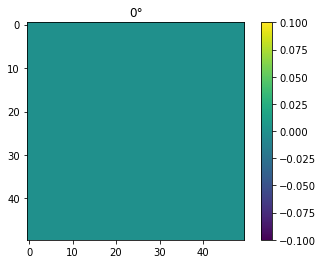

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
n=200
points = np.random.rand(n, 2)  # n是已知点个数
values = np.random.rand(n)  # 对应没每个点的值

# 插值的目标
# 注意，这里和普通使用数组的维度、下标不一样，是因为如果可视化的话，imshow坐标轴和一般的不一样
x, y = np.mgrid[
        1:20:50j,
        1:20:50j]
print(points.shape,values.shape,x.shape)
print(values)
# grid就是插值结果，你想要的到的区间的每个点数据都在这个grid矩阵里
grid = griddata(points, values, (x, y), method="linear", fill_value=0)

# 这里通过imshow显示时，坐标思维要按照计算机的来，普通图片是2维数组
# x 是最终结果的第一维，下标是从上到下由零增加
# y 是最终结果的第二维，下标是从左到右由零增加
plt.subplot(1, 1, 1)
plt.title("0°")
plt.imshow(grid)  # contourf jet gray
plt.colorbar()
plt.show()


(3050, 2) 3050 3050
516.2 0.0


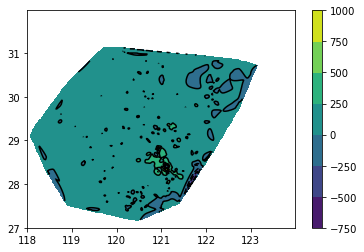

In [4]:
import pandas as pd
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import ceil, floor
%matplotlib inline
from ncmaps import Cmaps

import numpy as np

import xarray as xr

import pandas as pd

import os

rgb_file = 'ncl_default'
#以下是核心api,实质为调用Cmaps基类的listmap()方法
cmaps = Cmaps('ncl_default',self_define_list).listmap()

filepath = '/home/liyuan3970/3DVAR_retrive_radar_wind_from_typhoon1909/ncl/zdz/zdz_RR/RR_all_right.csv'

df = pd.read_csv(filepath,header=None)
#df

lat = list(df.iloc[:,1])
lon = list(df.iloc[:,2])
r = list(df.iloc[:,3])


#print(r)

N = len(r)


a = []
b = []
z = []

for i in range(N):
    if r[i]!=-9999.0:
        a.append(round(lon[i],2))
        b.append(round(lat[i],2))
        z.append(round(r[i],2))
    else:
        print(r[i])

lat = b
lon = a
r = z
Ni = len(r)
Zi = z
x = np.arange(118,124,0.02)
#print(x)
y = np.arange(27,32,0.02)
nx0 =len(x)
ny0 =len(y)
X, Y = np.meshgrid(x, y)#100*100
    #print(X.shape)
# x, y = np.mgrid[
#         118:124:200j,
#         27:32:200j]
P = np.array([X.flatten(), Y.flatten() ]).transpose()
    
Pi =  np.array([a, b ]).transpose()
#Z_linear = griddata(Pi, Zi,(x, y), method = "cubic")#.reshape([ny0,nx0])    
Z_linear = griddata(Pi, Zi, P, method = "cubic").reshape([ny0,nx0])
#print(Z_linear)
print(Pi.shape,len(Zi),Ni)
print(max(Zi),min(Zi))
#print(lon)
#plt.imshow(Z_linear) 
#print(Zi)
plt.contourf(X, Y, Z_linear)
#plt.contourf(X, Y, Z_linear)
plt.colorbar()
plt.contour(X, Y, Z_linear, colors = "k")
# #plt.triplot(Xi, Yi , tri.simplices.copy(), color = "k")
# #plt.plot(x0, y0, "or", label = "Data")
# #plt.legend()
# plt.grid()

In [ ]:
"/home/liyuan3970/Typhoon_LMQ/notebooks/RR_region.csv"

471.0 0.0


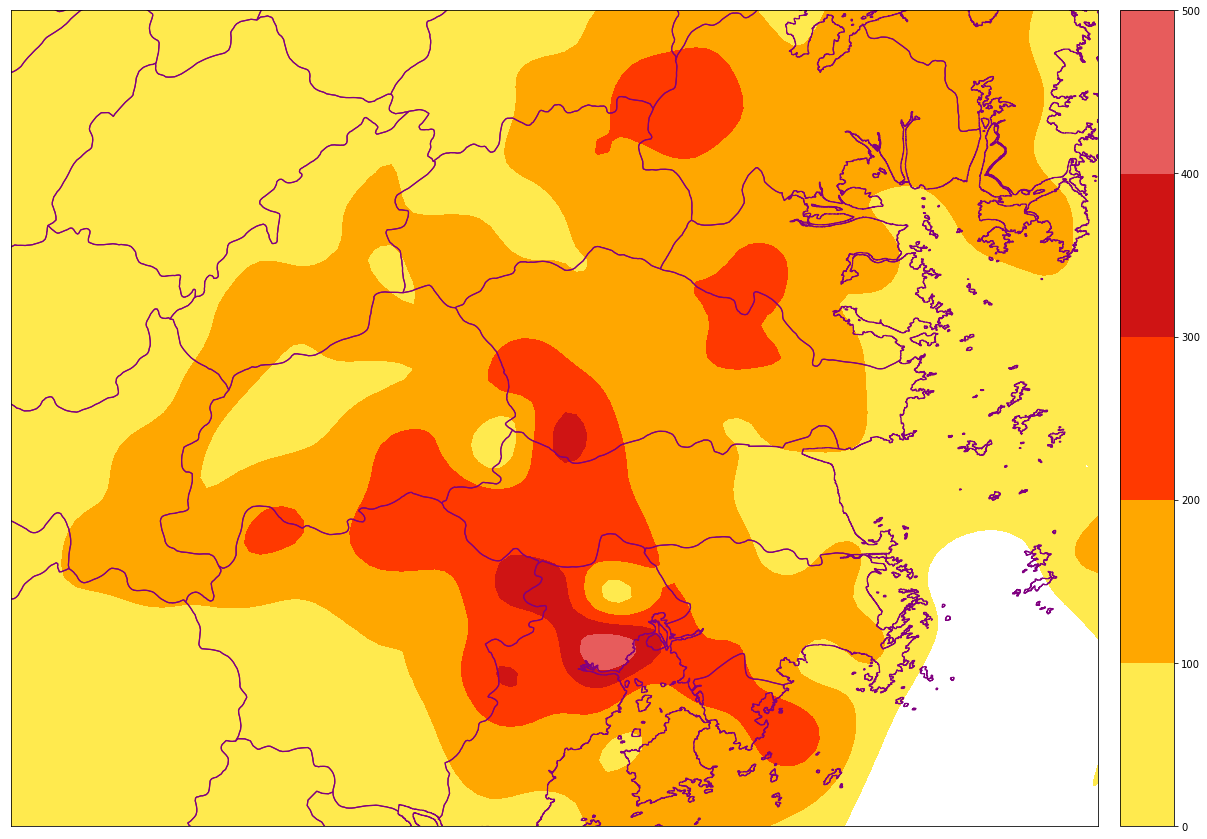

In [2]:
import pandas as pd
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import ceil, floor
%matplotlib inline

import cartopy.crs as ccrs
import numpy as np

import xarray as xr

import pandas as pd

import os

filepath = "/home/liyuan3970/Typhoon_LMQ/notebooks/RR_region.csv"

df = pd.read_csv(filepath,header=None)
#df

lat = list(df.iloc[:,1])
lon = list(df.iloc[:,2])
r = list(df.iloc[:,3])


#print(r)

N = len(r)


a = []
b = []
z = []

for i in range(N):
    if r[i]!=-9999.0:
        a.append(round(lon[i],2))
        b.append(round(lat[i],2))
        z.append(round(r[i],2))
    else:
        print("缺测：",r[i])

lat = b
lon = a
r = z
Ni = len(r)
Zi = z
x = np.arange(118,124,0.02)
#print(x)
y = np.arange(27,32,0.02)
nx0 =len(x)
ny0 =len(y)
X, Y = np.meshgrid(x, y)#100*100
    #print(X.shape)
# x, y = np.mgrid[
#         118:124:200j,
#         27:32:200j]
P = np.array([X.flatten(), Y.flatten() ]).transpose()
    
Pi =  np.array([a, b ]).transpose()
#Z_linear = griddata(Pi, Zi,(x, y), method = "cubic")#.reshape([ny0,nx0])    
#Z_linear = griddata(Pi, Zi, P, method = "linear").reshape([ny0,nx0])
Z_linear = griddata(Pi, Zi, P, method = "cubic").reshape([ny0,nx0])

# 数据平滑
from astropy.convolution import convolve, Gaussian2DKernel, Tophat2DKernel
from astropy.modeling.models import Gaussian2D
gauss_kernel = Gaussian2DKernel(2)
smoothed_data_gauss = convolve(Z_linear, gauss_kernel)


#xrr =xr.DataArray(Z_linear, coords=[y, x], dims=['lat', 'lon'])

xrr =xr.DataArray(smoothed_data_gauss, coords=[y, x], dims=['lat', 'lon'])







####################################################################################################################################


plt.figure(figsize=(25, 15))

from ncmaps import Cmaps

from matplotlib import cm
from ncmaps import Cmaps
from mpl_toolkits.basemap import Basemap

self_define_list = [130,144,155,170,185,200,225,235,240,244]

levels = [0,100,200,300,400,500]
rgb_file = 'ncl_default'
#以下是核心api,实质为调用Cmaps基类的listmap()方法
cmaps = Cmaps('ncl_default',self_define_list).listmap()
m = Basemap(llcrnrlon=120,llcrnrlat=28.0,urcrnrlon=122.0,urcrnrlat=29.5)
fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang'
shade = m.contourf(X,Y,xrr,cmap=cmaps,levels=levels)
m.readshapefile(fname,'zhejiang',color='purple',linewidth=1.2)
m.colorbar(shade)
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.coastlines()
# xrr.plot()


#print(Z_linear)
# print(Pi.shape,len(Zi),Ni)
print(max(Zi),min(Zi))
# #print(lon)
# #plt.imshow(Z_linear) 
# #print(Zi)
# plt.contourf(X, Y, Z_linear)
# #plt.contourf(X, Y, Z_linear)
# plt.colorbar()
# plt.contour(X, Y, Z_linear, colors = "k")
# #plt.triplot(Xi, Yi , tri.simplices.copy(), color = "k")
# #plt.plot(x0, y0, "or", label = "Data")
# #plt.legend()
# plt.grid()
plt.savefig("../picture/rain")

#  叠加地形

471.0 0.0


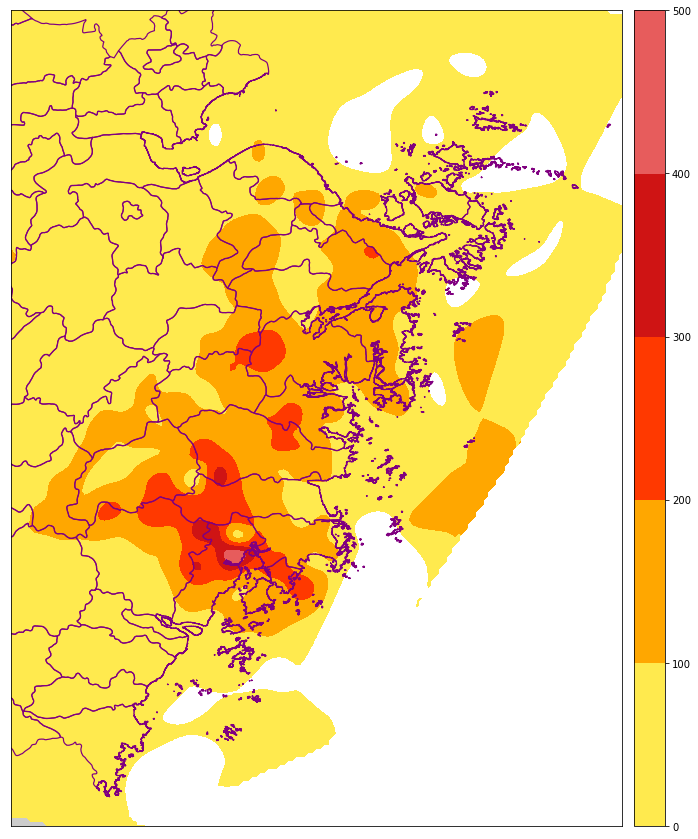

In [8]:
import pandas as pd
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import ceil, floor
%matplotlib inline

import cartopy.crs as ccrs
import numpy as np

import xarray as xr

import pandas as pd

import os

filepath = "/home/liyuan3970/Typhoon_LMQ/notebooks/RR_region.csv"

df = pd.read_csv(filepath,header=None)
#df

lat = list(df.iloc[:,1])
lon = list(df.iloc[:,2])
r = list(df.iloc[:,3])


#print(r)

N = len(r)


a = []
b = []
z = []

for i in range(N):
    if r[i]!=-9999.0:
        a.append(round(lon[i],2))
        b.append(round(lat[i],2))
        z.append(round(r[i],2))
    else:
        print("缺测：",r[i])

lat = b
lon = a
r = z
Ni = len(r)
Zi = z
x = np.arange(118,124,0.02)
#print(x)
y = np.arange(27,32,0.02)
nx0 =len(x)
ny0 =len(y)
X, Y = np.meshgrid(x, y)#100*100
    #print(X.shape)
# x, y = np.mgrid[
#         118:124:200j,
#         27:32:200j]
P = np.array([X.flatten(), Y.flatten() ]).transpose()
    
Pi =  np.array([a, b ]).transpose()
#Z_linear = griddata(Pi, Zi,(x, y), method = "cubic")#.reshape([ny0,nx0])    
#Z_linear = griddata(Pi, Zi, P, method = "linear").reshape([ny0,nx0])
Z_linear = griddata(Pi, Zi, P, method = "cubic").reshape([ny0,nx0])

# 数据平滑
from astropy.convolution import convolve, Gaussian2DKernel, Tophat2DKernel
from astropy.modeling.models import Gaussian2D
gauss_kernel = Gaussian2DKernel(2)
smoothed_data_gauss = convolve(Z_linear, gauss_kernel)


#xrr =xr.DataArray(Z_linear, coords=[y, x], dims=['lat', 'lon'])

xrr =xr.DataArray(smoothed_data_gauss, coords=[y, x], dims=['lat', 'lon'])







####################################################################################################################################


plt.figure(figsize=(25, 15))

from ncmaps import Cmaps

from matplotlib import cm
from ncmaps import Cmaps
from mpl_toolkits.basemap import Basemap

self_define_list = [130,144,155,170,185,200,225,235,240,244]

levels = [0,100,200,300,400,500]
rgb_file = 'ncl_default'
#以下是核心api,实质为调用Cmaps基类的listmap()方法
cmaps = Cmaps('ncl_default',self_define_list).listmap()
m = Basemap(llcrnrlon=120,llcrnrlat=27.0,urcrnrlon=123.0,urcrnrlat=31)
fname = '/home/liyuan3970/Data/data/meto_data/geogphy_file/zhejiang'
shade = m.contourf(X,Y,xrr,cmap=cmaps,levels=levels)
m.readshapefile(fname,'zhejiang',color='purple',linewidth=1.2)
m.colorbar(shade)
m.drawlsmask(ocean_color='w')
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.coastlines()
# xrr.plot()


#print(Z_linear)
# print(Pi.shape,len(Zi),Ni)
print(max(Zi),min(Zi))
# #print(lon)
# #plt.imshow(Z_linear) 
# #print(Zi)
# plt.contourf(X, Y, Z_linear)
# #plt.contourf(X, Y, Z_linear)
# plt.colorbar()
# plt.contour(X, Y, Z_linear, colors = "k")
# #plt.triplot(Xi, Yi , tri.simplices.copy(), color = "k")
# #plt.plot(x0, y0, "or", label = "Data")
# #plt.legend()
# plt.grid()
plt.savefig("../picture/rain")

# 绘制浙江省降水

          0          1           2       3
0     K0101  28.450000  119.483333  45.250
1     K0102  27.983333  119.633333  45.875
2     K1001  30.266667  120.166667  47.125
3     K1002  30.366667  120.133333  58.500
4     K1003  30.300000  120.333333  39.000
...     ...        ...         ...     ...
3045  58762  27.783333  121.083333  42.875
3046  58763  28.183333  121.100000  51.875
3047  58764  27.466667  121.083333  18.250
3048  58765  27.633333  121.200000  21.375
3049  58768  27.550000  121.400000  40.750

[3050 rows x 4 columns]


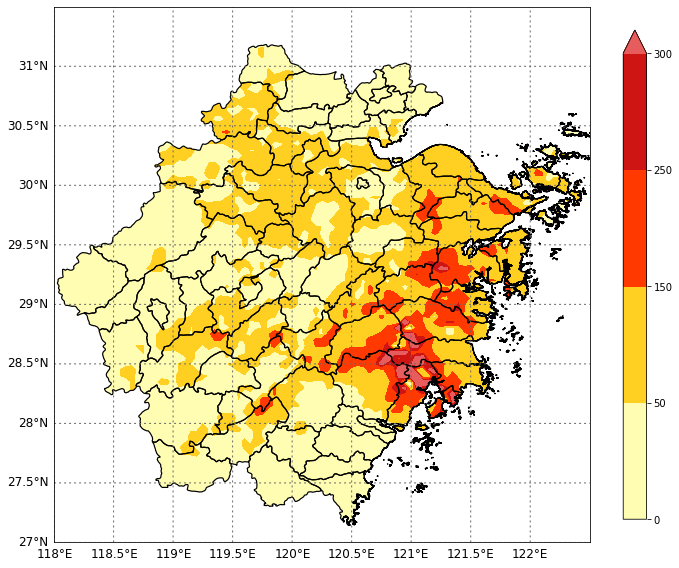

In [2]:
#coding=utf-8
from scipy.interpolate import griddata

import matplotlib as mpl
from math import ceil, floor
%matplotlib inline
from rasterio import features
from affine import Affine

import numpy as np

import xarray as xr

import pandas as pd

import os

from mpl_toolkits.basemap import Basemap
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
#from osgeo import gdal

import cartopy.crs as ccrs
import shapefile

from matplotlib.font_manager import FontProperties
import netCDF4 as nc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib
from math import isnan
import geopandas as gpd

from ncmaps import Cmaps

filepath = "/home/liyuan3970/Typhoon_LMQ/notebooks/RR_region.csv"

df = pd.read_csv(filepath,header=None)
#df
print(df)
lat = list(df.iloc[:,1])
lon = list(df.iloc[:,2])
r = list(df.iloc[:,3])

def transform_from_latlon(lat, lon):
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    trans = Affine.translation(lon[0], lat[0])
    scale = Affine.scale(lon[1] - lon[0], lat[1] - lat[0])
    return trans * scale

def rasterize(shapes, coords, latitude='lat', longitude='lon',
              fill=np.nan, **kwargs):
    transform = transform_from_latlon(coords[latitude], coords[longitude])
    out_shape = (len(coords[latitude]), len(coords[longitude]))
    raster = features.rasterize(shapes, out_shape=out_shape,
                                fill=fill, transform=transform,
                                dtype=float, **kwargs)
    spatial_coords = {latitude: coords[latitude], longitude: coords[longitude]}
    return xr.DataArray(raster, coords=spatial_coords, dims=(latitude, longitude))

def add_shape_coord_from_data_array(xr_da, shp_path, coord_name):
    # 1. read in shapefile
    shp_gpd = gpd.read_file(shp_path)

    # 2. create a list of tuples (shapely.geometry, id)
    #    this allows for many different polygons within a .shp file (e.g. States of US)
    shapes = [(shape, n) for n, shape in enumerate(shp_gpd.geometry)]

    # 3. create a new coord in the xr_da which will be set to the id in `shapes`
    xr_da[coord_name] = rasterize(shapes, xr_da.coords, 
                               longitude='lon', latitude='lat')

    return xr_da


def basemask(cs, ax, map, shpfile):

    sf = shapefile.Reader(shpfile)
    vertices = []
    codes = []
    for shape_rec in sf.shapeRecords():
        if shape_rec.record[0] >= 0:  
            pts = shape_rec.shape.points
            prt = list(shape_rec.shape.parts) + [len(pts)]
            for i in range(len(prt) - 1):
                for j in range(prt[i], prt[i+1]):
                    vertices.append(map(pts[j][0], pts[j][1]))
                codes += [Path.MOVETO]
                codes += [Path.LINETO] * (prt[i+1] - prt[i] -2)
                codes += [Path.CLOSEPOLY]
            clip = Path(vertices, codes)
            clip = PathPatch(clip, transform = ax.transData)    
    for contour in cs.collections:
        contour.set_clip_path(clip)    



def makedegreelabel(degreelist):
    labels=[str(x)+u'°E' for x in degreelist]
    return labels


def plot_image(lat,lon,value):
    #线性插值
    N = len(r)
    a = []
    b = []
    z = []
    for i in range(N):
        if r[i]!=-9999.0:
            a.append(round(lon[i],2))
            b.append(round(lat[i],2))
            z.append(round(r[i],2))
    lat = np.array(b)
    lon = np.array(a)
    Zi = np.array(z)
    data_max = max(Zi)
    data_min = min(Zi)
    np.set_printoptions(precision = 2)
    x = np.arange(118.0,122.5,0.05)
    #print(x)
    y = np.arange(27.0,31.5,0.05)
    nx0 =len(x)
    ny0 =len(y)
    X, Y = np.meshgrid(x, y)#100*100
    P = np.array([X.flatten(), Y.flatten() ]).transpose()    
    Pi =  np.array([lon, lat ]).transpose()
    Z_linear = griddata(Pi, Zi, P, method = "nearest").reshape([ny0,nx0])
    #绘图
#     levels = np.linspace(start = data_min, stop = data_max, num = 7)
    levels = [0,50,150,250,300]
    self_define_list = [130,144,155,170,185,200,225,235,240,244]
    rgb_file = 'ncl_default'
    #以下是核心api,实质为调用Cmaps基类的listmap()方法
    cmaps = Cmaps('ncl_default',self_define_list).listmap()
    # plt.rcParams.update({'font.size': 20})
    # 调整图片大小
    fig = plt.figure(figsize=[12,18]) 
    ax = fig.add_subplot(111)
#     plt.subplots_adjust(top=50,bottom=20,left=0,right=50,hspace=0,wspace=0)
    filepath = "/home/liyuan3970/Data/data/meto_data/geogphy_file/"
    data_xr = xr.DataArray(Z_linear, coords=[ y,x], 
                        dims=["lat", "lon"])
    shp_da = add_shape_coord_from_data_array(data_xr, filepath+"zhejiang.shp", "test")
    awash_da = shp_da.where(shp_da.test<7, other=np.nan)
    m = Basemap(llcrnrlon=118.0,llcrnrlat=27.0,urcrnrlon=122.5,urcrnrlat=31.5,resolution = None, projection = 'cyl')
    # 设置colorbar
    cbar_kwargs = {'shrink': 0.5}    
    cs = data_xr.plot.contourf(ax=ax, cmap=cmaps ,levels =levels,cbar_kwargs=cbar_kwargs,add_labels=False)
    m.readshapefile(filepath+'zhejiang','zhejiang',color='k',linewidth=1.2)
    parallels = np.arange(27.0,31.5,0.5)
    # labels = [left,right,top,bottom]
    m.drawparallels(parallels,labels=[True,False,True,False],color='dimgrey',dashes=[2, 3],fontsize= 12)  # ha= 'right'
    meridians = np.arange(118.0,122.5,0.5)
    m.drawmeridians(meridians,labels=[False,True,False,True],color='dimgrey',dashes=[2, 3],fontsize= 12)
    len_lat = len(data_xr.lat.data)
    len_lon = len(data_xr.lon.data)
#     for i in range(len_lon-1):
#         for j in range(len_lat-1):
#             y0 = round(27.8+j*0.05,2)
#             x0 = round(120.0+i*0.05,2)
#             if not isnan(awash_da.data[j,i]):
#                 plt.text(x0,y0,str(int(awash_da.data[j,i])),fontsize= 7,fontweight = 800 ,color ="black")
    basemask(cs, ax, m, filepath+'zhejiang')  
    

plot_image(lat,lon,r)



# plt.savefig("zhejiang.png", bbox_inches='tight')
plt.savefig("zhejiang.svg", bbox_inches='tight')


























In [ ]:
# 地图mask的例子

In [ ]:
#coding=utf-8
from mpl_toolkits.basemap import Basemap
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
#from osgeo import gdal
import numpy as np
import cartopy.crs as ccrs
import shapefile
import matplotlib as mpl
import xarray as xr
from matplotlib.font_manager import FontProperties
import netCDF4 as nc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib
#ZHfont = matplotlib.font_manager.FontProperties(fname='/Users/zhpfu/Documents/fonts/SimSun.ttf')

plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=[12,18]) 
ax = fig.add_subplot(111)


def basemask(cs, ax, map, shpfile):

    sf = shapefile.Reader(shpfile)
    vertices = []
    codes = []
    for shape_rec in sf.shapeRecords():
        if shape_rec.record[0] >= 0:  
            pts = shape_rec.shape.points
            prt = list(shape_rec.shape.parts) + [len(pts)]
            for i in range(len(prt) - 1):
                for j in range(prt[i], prt[i+1]):
                    vertices.append(map(pts[j][0], pts[j][1]))
                codes += [Path.MOVETO]
                codes += [Path.LINETO] * (prt[i+1] - prt[i] -2)
                codes += [Path.CLOSEPOLY]
            clip = Path(vertices, codes)
            clip = PathPatch(clip, transform = ax.transData)    
    for contour in cs.collections:
        contour.set_clip_path(clip)    



def makedegreelabel(degreelist):
    labels=[str(x)+u'°E' for x in degreelist]
    return labels


ds = xr.open_dataset('src/share/share/EC-Interim_monthly_2018.nc')
lat = ds.latitude
lon = ds.longitude
data = (ds['t2m'][0,::-1,:] - 273.15) # 把温度转换为℃

# [west,east,south,north]
m = Basemap(llcrnrlon=70.,
    llcrnrlat=25,
    urcrnrlon=110,
    urcrnrlat=50,
    resolution = None, 
    projection = 'cyl')


cbar_kwargs = {
    'orientation': 'horizontal',
    'label': 'Temperature(℃)',
    'ticks': np.arange(-30,30+1,10),
    'pad': -0.35,
    'shrink': 0.9
}

# 画图
levels = np.arange(-30,30+1,1) 
cs = data.plot.contourf(ax=ax,levels=levels,cbar_kwargs=cbar_kwargs, cmap='Spectral_r')

m.readshapefile('qinghai','qinghai',color='k',linewidth=1.2)
basemask(cs, ax, m, 'qinghai') 


# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(25.,50.+1,5.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[True,True,True,True],color='dimgrey',dashes=[2, 3],fontsize= 14)  # ha= 'right'
meridians = np.arange(70.,110.+1,5.)
m.drawmeridians(meridians,labels=[True,True,False,True],color='dimgrey',dashes=[2, 3],fontsize= 14)

plt.ylabel('')    #Remove the defult  lat / lon label  
plt.xlabel('')


plt.rcParams.update({'font.size':25})
ax.set_title(u'中国西部地区部分省份',color='blue',fontsize= 25 ) # 2m Temperature

#经度：87.68 ， 纬度：43.77
bill0 = 87.68
tip0  =  43.77
plt.scatter(bill0, tip0,marker='.',s=120 ,color ="r",zorder=2)

#经度：103.73 ， 纬度：36.03
bill1 =  103.73
tip1  = 36.03
plt.scatter(bill1, tip1,marker='.',s=120 ,color ="r" ,zorder=2)

#经度：101.74 ， 纬度：36.56
bill2 =  101.74
tip2  = 36.56
plt.scatter(bill2, tip2,marker='.',s=120 ,color ="r",zorder=2 )


bill3 =  104.1
tip3  = 30.65
plt.scatter(bill3, tip3,marker='.',s=120 ,color ="r",zorder=2 )


bill4 =  91.11
tip4  = 29.97

plt.scatter(bill4, tip4,marker='.',s=120 ,color ="r",zorder=2)



plt.rcParams.update({'font.size':18})

plt.text(bill0-2.0, tip0+0.3, u"test1",fontsize= 18 ,color ="r")
plt.text(bill1-1., tip1+0.3, u"test1"    ,fontsize= 18 ,color ="r")
plt.text(bill2-1., tip2+0.3, u"test1"    ,fontsize= 18 ,color ="r")
plt.text(bill3-1., tip3+0.3, u"test1"    ,fontsize= 18 ,color ="r")
plt.text(bill4-1., tip4+0.3, u"test1"    ,fontsize= 18 ,color ="r")


# Save & Show figure
plt.savefig("West_China_mask.png", dpi=300, bbox_inches='tight')
plt.show()